<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/main/projects/ECoG/exploreAJILE12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/projects/ECoG/exploreAJILE12.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Exploring AJILE12 dataset

## Objective

This notebook is designed as a guide for student projects in [Computational Neurosciecne Course](https://compneuro.neuromatch.io/) of [Neuromatch Academy](https://academy.neuromatch.io/).

## Scientific background

The AJILE12 dataset is the largest publicly available human neurobehavioral dataset, recorded during passive clinical epilepsy monitoring. It includes synchronized intracranial neural recordings and upper body pose trajectories across 55 semi-continuous days of naturalistic movements, along with relevant metadata. The dataset was created to understand the neural basis of human movement in naturalistic scenarios and expand neuroscience research beyond constrained laboratory paradigms. It is available on The DANDI Archive in the Neurodata Without Borders (NWB) data standard and can be explored using a browser-based dashboard.

For scientific background, see the following papers from [Bing Brunton lab](https://www.bingbrunton.com/bing) who graciously has released the **AJILE12 dandiset** on [DANDI](https://dandiarchive.org/dandiset/000055?search=ajile12&pos=1):

**Behavioral and Neural Variability of Naturalistic Arm Movements**. eNeuro, 2021. https://doi.org/10.1523/ENEURO.0007-21.2021

**Mining naturalistic human behaviors in long-term video and neural recordings**. Journal of Neuroscience Methods, 2021. https://doi.org/10.1016/j.jneumeth.2021.109199

## Data

Annotated Joints in Long-term Electrocorticography (AJILE12) from human participants; the dataset was recorded opportunistically during passive clinical epilepsy monitoring. AJILE12 includes synchronized intracranial neural recordings and upper body pose trajectories across 55 semi-continuous days of naturalistic movements, along with relevant metadata, including thousands of wrist movement events and annotated behavioral states. Neural recordings are available at 500 Hz from at least 64 electrodes per participant, for a total of 1280 hours. Pose trajectories at 9 upper-body keypoints, including wrist, elbow, and shoulder joints, were sampled at 30 frames per second and estimated from 118 million video frames.

The following link provides some information on the dataset:
[AJILE Data Readme](https://www.bingbrunton.com/ajile-readme)

The following paper provides a more through detail on data and acquisition:

**AJILE12: Long-term naturalistic human intracranial neural recordings and pose**. Scientific Data, 2022. https://doi.org/10.1038/s41597-022-01280-y

<img src="https://github.com/NeuromatchAcademy/course-content/blob/main/projects/docs/template_images/NeuromatchProject_AJILE12.svg?raw=1" width="1200">


## Environment Setup

This code is meant to be run in a notebook. It checks if the notebook is running on a Google Colab GPU, and if it is, it clones the Neuromatch-AJILE12 repository from GitHub, changes the current working directory to the Neuromatch-AJILE12k directory, and installs the package in editable mode using pip. This is done to set up the environment for using the Neuromatch-AJILE12 package in a Google Colab notebook. If you wish to run this code on a local machine, you can comment the next cell and simply clone the git link below.

In [ ]:
# @title Install dependencies
!pip install seaborn --quiet
!pip install statsmodels --quiet

In [ ]:
# @title Clean install of AJILE12 on Google Colab;
# @markdown This is to prevent overwriting conflicts. You can run this once for each new run instance on colab.
%cd /
%rm -rf /content/Neuromatch-AJILE12/ # removes old version of AJILE12 if it exists
%cd /content # change to content directory where AJILE12 will be installed

/
[Errno 2] No such file or directory: '/content # change to content directory where AJILE12 will be installed'
/


In [ ]:
# @title If running on Google Colab, run this cell once, then restart the runtime and run the rest of the notebook
import os
if "COLAB_GPU" in os.environ:
    !git clone https://github.com/neurovium/Neuromatch-AJILE12
    %cd Neuromatch-AJILE12
    %pip install -e . --quiet

Cloning into 'Neuromatch-AJILE12'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 292 (delta 130), reused 225 (delta 71), pack-reused 0
Receiving objects: 100% (292/292), 9.15 MiB | 11.18 MiB/s, done.
Resolving deltas: 100% (130/130), done.
/Neuromatch-AJILE12
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

## Read/Download data

### Access to data on DANDI
The data is hosted on **[DANDI](https://dandiarchive.org/)**, BRAIN Initiative's archive for publishing and sharing neurophysiology data including electrophysiology, optophysiology, behavioral time-series, and images from immunostaining experiments.

### NWB format

**AJILE12** is in **[NWB](https://www.nwb.org/)** format. NWB is a Hierarchical Data Format (HDF) intended for scientific data. HDF is a platform-independent file format that can be used on many different computers, regardless of the operating system that machine is running. To know more about HDF, you can visit [HDFGroup](https://portal.hdfgroup.org/display/support/Documentation).

For more information about NWB, see the following papers.

Neurodata Without Borders: Creating a Common Data Format for Neurophysiology. Neuron, 2015. https://doi.org/10.1016/j.neuron.2015.10.025

The Neurodata Without Borders ecosystem for neurophysiological data science. eLife, 2022. https://doi.org/10.7554/eLife.78362

[NWB documentation](https://nwb-overview.readthedocs.io/en/latest/) provides further information on the data structure and Python/Matlab APIs to access it.


### Setup for read/download

In [ ]:
# Numerical and plotting packages
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import natsort
from scipy.signal import sosfiltfilt, butter, hilbert

In [ ]:
# Libraries needed for this notebook to interact with the DANDI API
from pynwb import NWBHDF5IO
from dandi.dandiapi import DandiAPIClient

# Libraries needed for this notebook to interact with NWB events
from ndx_events import LabeledEvents, AnnotatedEventsTable, Events

# FSSpec is a library that allows us to read files from the cloud
import fsspec

# NWB is based on HF5, so we need this library to read NWB files
import h5py

### Access to data on cloud
The data is hosted on [AMAZON AWS](https://aws.amazon.com) in **S3** buckets. The following steps guide you to locate the data based on the **dandiset** information, setup streaming and reading the data from the cloud. Alternatively, you can access the data on **[DANDI](https://dandiarchive.org/dandiset/000055?search=ajile12&pos=1)**. If you choose to directly download from DANDI, you will need a github account. The following code will be sufficient to programatically download/stream data (either for colab notebook or for your own personal machine).

In [ ]:
# Subject and session number for loading dataThese parameters can be adjusted to analyze other electrodes, frequency bands, behavior types, participants, sessions, etc.
# Example:
# Select data from participant 1, session 3 only during times that the participant was eating.
# ECoG data will be converted to spectral power in the gamma band (80-100 Hz) for electrode 7, which is located over the motor cortex.
# We will also look at the vertical velocity of the right wrist.


sbj, session = 1, 3  # participant 1, session 3
behavior_type = 'Eat' # only analyze data during eating
neural_freq_range = [80, 100]  # Frequency band of interest in Hz
ecog_ch_num = 7 # electrode number over motor cortex
keypoint_of_interest = 'R_Wrist' # right wrist movement
pose_direction = 'vertical'  # 'vertical' or 'horizontal'

In [ ]:
# You can read specific sections within individual data files directly from remote stores such as the DANDI Archive.
# This is especially useful for reading small pieces of data from a large NWB file stored remotely. First, you will need to get the location of the file.
# Now you can get the url of a particular NWB file using the dandiset ID and the path of that file within the dandiset.
with DandiAPIClient() as client:
    asset = client.get_dandiset("000055").get_asset_by_path(
        "sub-{0:>02d}/sub-{0:>02d}_ses-{1:.0f}_behavior+ecephys.nwb".format(sbj, session)
    )
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

In [ ]:
# s3_path is the url of the file on the DANDI Archive. You can now use this url to read the file using pynwb.
# Note that this url path may change if the file is updated on the DANDI Archive. ALWAYS use the "dandiset ID" and "path" to the file within the dandiset to get the url.
s3_path

'https://dandiarchive.s3.amazonaws.com/blobs/e54/21f/e5421ff3-05f6-4d5e-a884-6d3e57a11951'

### Note on streaming
There are two methods for streaming NWB data from the cloud using **[PyNWB streaming](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html)**. Currently, Colab is natively not compatible with ROS3 (read only S3); though you can use that ROS3 method for a local machine/server. If you wish to use ROS3 (instead of fsspec) on Colab, see the details in the [local readme.txt](./plot_utils/readme.txt) file.

In [ ]:

# You can also read specific sections within individual data files directly from remote stores such as the DANDI Archive.
from fsspec.implementations.cached import CachingFileSystem

# Note, caching is set once per access. If you want to change the cache location, you will need to restart the kernel.
fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # Local folder for the cache
)

f = fs.open(s3_path, "rb")
file = h5py.File(f)
io = NWBHDF5IO(file=file, mode='r', load_namespaces=True)
nwbfile = io.read()

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Examine NWB

Check NWB file and its content.

In [ ]:
# You can now access the data in the file as you would normally do with NWB files.
nwbfile

root pynwb.file.NWBFile at 0x140485795389664
Fields:
  acquisition: {
    ECGL <class 'pynwb.base.TimeSeries'>,
    ECGR <class 'pynwb.base.TimeSeries'>,
    EOGL <class 'pynwb.base.TimeSeries'>,
    EOGR <class 'pynwb.base.TimeSeries'>,
    ElectricalSeries <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    ECG <class 'pynwb.device.Device'>,
    EOG <class 'pynwb.device.Device'>,
    GRID <class 'pynwb.device.Device'>,
    LAT <class 'pynwb.device.Device'>,
    LID <class 'pynwb.device.Device'>,
    LMT <class 'pynwb.device.Device'>,
    LPT <class 'pynwb.device.Device'>,
    LTO <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    ECG <class 'pynwb.ecephys.ElectrodeGroup'>,
    EOG <class 'pynwb.ecephys.ElectrodeGroup'>,
    GRID <class 'pynwb.ecephys.ElectrodeGroup'>,
    LAT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LID <class 'pynwb.ecephys.ElectrodeGroup'>,
    LMT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LPT <class 'pynwb.ecephys.ElectrodeGroup'>,
    LTO 

Get information about the electrodes.

In [ ]:
# Information about the electrodes is stored in the nwbfile.electrodes table.
nwbfile.electrodes

electrodes hdmf.common.table.DynamicTable at 0x140485795392208
Fields:
  colnames: ['x' 'y' 'z' 'imp' 'location' 'filtering' 'group' 'group_name'
 'standard_deviation' 'kurtosis' 'median_deviation' 'good' 'low_freq_R2'
 'high_freq_R2']
  columns: (
    x <class 'hdmf.common.table.VectorData'>,
    y <class 'hdmf.common.table.VectorData'>,
    z <class 'hdmf.common.table.VectorData'>,
    imp <class 'hdmf.common.table.VectorData'>,
    location <class 'hdmf.common.table.VectorData'>,
    filtering <class 'hdmf.common.table.VectorData'>,
    group <class 'hdmf.common.table.VectorData'>,
    group_name <class 'hdmf.common.table.VectorData'>,
    standard_deviation <class 'hdmf.common.table.VectorData'>,
    kurtosis <class 'hdmf.common.table.VectorData'>,
    median_deviation <class 'hdmf.common.table.VectorData'>,
    good <class 'hdmf.common.table.VectorData'>,
    low_freq_R2 <class 'hdmf.common.table.VectorData'>,
    high_freq_R2 <class 'hdmf.common.table.VectorData'>
  )
  descripti

In [ ]:
# Specific information about the electrode of interest can be accessed using the electrode number.
nwbfile.electrodes[ecog_ch_num]

x          y          z  imp location       filtering  \
id                                                                  
7  -53.896469 -29.059873  62.709102  NaN  unknown  250 Hz lowpass   

                                                group group_name  \
id                                                                 
7   GRID pynwb.ecephys.ElectrodeGroup at 0x1404857...       GRID   

    standard_deviation  kurtosis  median_deviation  good  low_freq_R2  \
id                                                                      
7            45.422554  2.707063         37.685382  True     0.103835   

    high_freq_R2  
id                
7       0.055118

In [ ]:
# assign the cloud path to a variable
from hdmf.common.table import DynamicTable

# assuming you have already loaded your NWB file into memory
electrodes = nwbfile.electrodes
print(electrodes)

electrodes hdmf.common.table.DynamicTable at 0x140485795392208
Fields:
  colnames: ['x' 'y' 'z' 'imp' 'location' 'filtering' 'group' 'group_name'
 'standard_deviation' 'kurtosis' 'median_deviation' 'good' 'low_freq_R2'
 'high_freq_R2']
  columns: (
    x <class 'hdmf.common.table.VectorData'>,
    y <class 'hdmf.common.table.VectorData'>,
    z <class 'hdmf.common.table.VectorData'>,
    imp <class 'hdmf.common.table.VectorData'>,
    location <class 'hdmf.common.table.VectorData'>,
    filtering <class 'hdmf.common.table.VectorData'>,
    group <class 'hdmf.common.table.VectorData'>,
    group_name <class 'hdmf.common.table.VectorData'>,
    standard_deviation <class 'hdmf.common.table.VectorData'>,
    kurtosis <class 'hdmf.common.table.VectorData'>,
    median_deviation <class 'hdmf.common.table.VectorData'>,
    good <class 'hdmf.common.table.VectorData'>,
    low_freq_R2 <class 'hdmf.common.table.VectorData'>,
    high_freq_R2 <class 'hdmf.common.table.VectorData'>
  )
  descripti

### NWB-WIDGETS

It can get cumbersome to manually dissect an NWB file with print statements. There are a few ways to view an NWB graphically instead. A great way to do this in a Jupyter notebook is with **[NWBWidgets](https://github.com/NeurodataWithoutBorders/nwbwidgets)**. Here, you can use NWBWidgets to view a file from a location on your machine. If you don't want to download a file just to view it, you can still use NWBWidgets to view it remotely. Check out [Streaming an NWB File with fsspec](./stream_nwb.ipynb) to learn how to do this. Another way to explore an NWB file, that doesn't require Jupyter, is with [HDFView](https://www.hdfgroup.org/downloads/hdfview/)

In [ ]:
# Use the nwbwidgets package to visualize the NWB file, explore the data, and access the metadata.
from nwbwidgets import nwb2widget
nwb2widget(nwbfile)

## Information and metadata

Each subject has multiple experimental sessions. You can check that programatically.

In [ ]:
# get the path to each subject's session behavior/ecephys files
with DandiAPIClient() as client:
    paths = []
    for file in client.get_dandiset("000055", "draft").get_assets_with_path_prefix(""):
        paths.append(file.path)
paths = natsort.natsorted(paths)
# print(paths)
paths

['sub-01/sub-01_ses-3_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-4_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-5_behavior+ecephys.nwb',
 'sub-01/sub-01_ses-7_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-3_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-4_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-5_behavior+ecephys.nwb',
 'sub-02/sub-02_ses-6_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-3_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-4_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-5_behavior+ecephys.nwb',
 'sub-03/sub-03_ses-6_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-3_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-4_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-5_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-6_behavior+ecephys.nwb',
 'sub-04/sub-04_ses-7_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-3_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-4_behavior+ecephys.nwb',
 'sub-05/sub-05_ses-7_behavior+ecephys.nwb',
 'sub-06/sub-06_ses-3_behavior+ecephys.nwb',
 'sub-06/sub-06_ses-4_behavior+ecephys.nwb',
 'sub-06/s

### Data characteristics for each participant
Get the list of hemisphere implanted, and number of recording days for each participant and turn it to a dataframe.

In [ ]:
from plot_utils import load_data_characteristics

rec_days, hemi, surf_tot, surf_good, depth_tot, depth_good, _, part, _, _ = load_data_characteristics(fs=fs)

ages = [
    44, 20, 33, 19, 31, 37, 26, 33, 20, 34, 34, 22
]  # not found in data files
gender = [
    'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'M'
]  # not found in data files
surf_elecs = [str(val_good)+' / '+str(val_tot) for val_good, val_tot in zip(surf_good, surf_tot)]
depth_elecs = [str(val_good)+' / '+str(val_tot) for val_good, val_tot in zip(depth_good, depth_tot)]

# Generate a dataframe with the data characteristics
pd.DataFrame(
    [part, gender, ages, rec_days, hemi, surf_elecs, depth_elecs],
    index=[
        'Participant',
        'Gender',
        'Age (years)',
        'Recording days used',
        'Hemisphere implanted',
        'Surface electrodes: # good / total',
        'Depth electrodes: # good / total'
    ]
).T

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
  8%|▊         | 1/12 [00:07<01:19,  7.23s/it]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hd

Participant Gender Age (years) Recording days used Hemisphere implanted  \
0          P01      M          44                   4                    L   
1          P02      M          20                   4                    R   
2          P03      M          33                   4                    L   
3          P04      F          19                   5                    R   
4          P05      F          31                   3                    R   
5          P06      M          37                   5                    L   
6          P07      M          26                   5                    R   
7          P08      F          33                   5                    R   
8          P09      M          20                   5                    L   
9          P10      M          34                   5                    L   
10         P11      F          34                   5                    L   
11         P12      M          22                   5                    L   

   Surface electrodes: # good / total Depth electrodes: # good / total  
0                             79 / 86                            6 / 8  
1                             69 / 70                          16 / 16  
2                             79 / 80                           0 / 16  
3                             67 / 84                            0 / 0  
4                           104 / 106                            0 / 0  
5                             70 / 80                            0 / 0  
6                             63 / 64                            0 / 0  
7                             83 / 92                            0 / 0  
8                             96 / 98                          28 / 28  
9                             82 / 86                          39 / 40  
10                          103 / 106                            0 / 0  
11                            88 / 92                          24 / 32

### Get the duration for coarse behaviors (Sleep/rest, Inactive, Talk, TV, Computer/phone, Eat, Other activity) in each subject

In [ ]:
# Count activity and blocklist coarse label durations for each participant
from plot_utils import clabel_table_create
blocklist_labels = False  # show blocklist (True) or activity (False) label durations

if blocklist_labels:
    common_acts = [
        'Blocklist (Data break)',
        'Blocklist (Camera move/zoom)',
        'Blocklist (Camera occluded)',
        'Blocklist (Experiment)',
        'Blocklist (Private time)',
        'Blocklist (Tether/bandage)',
        'Blocklist (Hands under blanket)',
        'Blocklist (Clinical procedure)',
    ]
else:
    common_acts = [
        'Sleep/rest',
        'Inactive',
        'Talk',
        'TV',
        'Computer/phone',
        'Eat',
        'Other activity',
    ]

# Generate table
clabel_table_create(common_acts,fs=fs)

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version

Sleep/rest  Inactive  Talk    TV  Computer/phone  Eat  Other activity  \
P01        29.2       1.9  15.6  22.0             7.8  2.6             0.8   
P02        53.2       2.1   9.2   7.7             2.9  2.1             4.8   
P03        11.9       0.3  21.8   1.9            19.8  3.5             0.9   
P04        34.0       3.1  28.3  11.0             8.2  2.0             1.2   
P05        35.4       2.8   8.9  12.1             5.8  1.0             1.2   
P06        37.8       0.1   2.8   5.7             2.6  0.3             0.2   
P07        46.8       0.3   5.0   0.3             1.9  0.4             0.2   
P08        47.8       0.8   6.8   5.3             1.3  0.6             2.2   
P09        87.3       8.1   3.8   0.0             0.0  0.6             1.9   
P10        67.5       2.1   5.8   0.1             5.6  0.0             1.8   
P11        36.0       1.4   6.6   0.0             0.1  0.0             0.8   
P12        32.4       0.3   1.5   0.1             0.5  0.0             0.6   

     Total  
P01   75.7  
P02   79.8  
P03   51.1  
P04   78.9  
P05   62.5  
P06   45.3  
P07   53.6  
P08   61.8  
P09  100.6  
P10   81.4  
P11   44.9  
P12   35.4

## Behavioral labels

### Coarse behavior labelling trace for one recording day.
Note that the figure from the data paper combined the targeted (targeted=True) and untargeted (both first_val=True and first_val=False) behavior labels.

In [ ]:
# load the function to plot the coarse labels
from plot_utils import prune_clabels, plot_clabels

In [ ]:
#  set parameters for plotting coarse labels
targ_tlims = [13, 17]  # targeted window to plot (in hours)
targeted = False  # plot targeted window (True) or whole day (False)
targ_label = 'Computer/phone' #behavior_type

In [ ]:
# Load the data and coarse labels for the targeted window
with DandiAPIClient() as client:
    asset = client.get_dandiset("000055", "draft").get_asset_by_path(
        "sub-01/sub-01_ses-4_behavior+ecephys.nwb"
    )
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)
f = fs.open(s3_path, "rb")
file = h5py.File(f)
with NWBHDF5IO(file=file, mode='r', load_namespaces=True) as io:
# with NWBHDF5IO(s3_path, mode='r', load_namespaces=True, driver='ros3') as io:  #if you want to use ROS3 to stream data, use this line instead and comment the three lines above
    nwb = io.read()
    clabels_orig = nwb.intervals['epochs'].to_dataframe()

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [ ]:
# Select coarse labels based on user parameters
label_col_d = {
    'Other activity': 0,
    'Computer/phone': 1,
    'Eat': 2,
    'TV': 3,
    'Talk': 4
}

clabels, uni_labs = prune_clabels(clabels_orig, targeted,
                                  targ_tlims, None,
                                  targ_label)

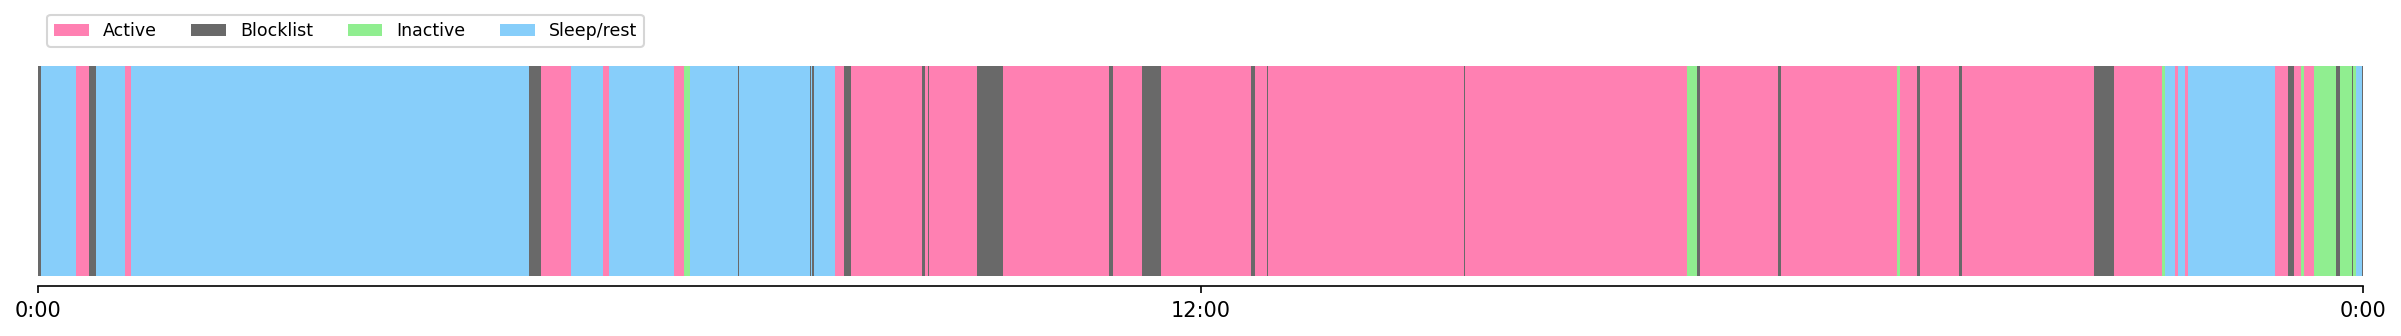

In [ ]:
# Plot coarse labels over time
fig = plot_clabels(clabels, uni_labs, targeted, None, targ_tlims, targlab_colind=label_col_d[targ_label])

## Spectral power in select frequency band for different grid locations.

### Get the information on grids/subjects

In [ ]:
# check if pickle file exists
!ls data/
# you should get a lost of files in the data folder:
# P01_Postcentral.npy   P05_Postcentral.npy   P09_Postcentral.npy
# P01_Precentral.npy    P05_Precentral.npy    P09_Precentral.npy
# P01_Temporal_Inf.npy  P05_Temporal_Inf.npy  P09_Temporal_Inf.npy
# P01_Temporal_Mid.npy  P05_Temporal_Mid.npy  P09_Temporal_Mid.npy
# P02_Postcentral.npy   P06_Postcentral.npy   P10_Postcentral.npy
# P02_Precentral.npy    P06_Precentral.npy    P10_Precentral.npy
# P02_Temporal_Inf.npy  P06_Temporal_Inf.npy  P10_Temporal_Inf.npy
# P02_Temporal_Mid.npy  P06_Temporal_Mid.npy  P10_Temporal_Mid.npy
# P03_Postcentral.npy   P07_Postcentral.npy   P11_Postcentral.npy
# P03_Precentral.npy    P07_Precentral.npy    P11_Precentral.npy
# P03_Temporal_Inf.npy  P07_Temporal_Inf.npy  P11_Temporal_Inf.npy
# P03_Temporal_Mid.npy  P07_Temporal_Mid.npy  P11_Temporal_Mid.npy
# P04_Postcentral.npy   P08_Postcentral.npy   P12_Postcentral.npy
# P04_Precentral.npy    P08_Precentral.npy    P12_Precentral.npy
# P04_Temporal_Inf.npy  P08_Temporal_Inf.npy  P12_Temporal_Inf.npy
# P04_Temporal_Mid.npy  P08_Temporal_Mid.npy  P12_Temporal_Mid.npy

P01_Postcentral.npy   P05_Postcentral.npy   P09_Postcentral.npy
P01_Precentral.npy    P05_Precentral.npy    P09_Precentral.npy
P01_Temporal_Inf.npy  P05_Temporal_Inf.npy  P09_Temporal_Inf.npy
P01_Temporal_Mid.npy  P05_Temporal_Mid.npy  P09_Temporal_Mid.npy
P02_Postcentral.npy   P06_Postcentral.npy   P10_Postcentral.npy
P02_Precentral.npy    P06_Precentral.npy    P10_Precentral.npy
P02_Temporal_Inf.npy  P06_Temporal_Inf.npy  P10_Temporal_Inf.npy
P02_Temporal_Mid.npy  P06_Temporal_Mid.npy  P10_Temporal_Mid.npy
P03_Postcentral.npy   P07_Postcentral.npy   P11_Postcentral.npy
P03_Precentral.npy    P07_Precentral.npy    P11_Precentral.npy
P03_Temporal_Inf.npy  P07_Temporal_Inf.npy  P11_Temporal_Inf.npy
P03_Temporal_Mid.npy  P07_Temporal_Mid.npy  P11_Temporal_Mid.npy
P04_Postcentral.npy   P08_Postcentral.npy   P12_Postcentral.npy
P04_Precentral.npy    P08_Precentral.npy    P12_Precentral.npy
P04_Temporal_Inf.npy  P08_Temporal_Inf.npy  P12_Temporal_Inf.npy
P04_Temporal_Mid.npy  P08_Temporal_Mi

If the pickle file does not exist, then run the following cell to create it (You may need to do this if you are running the notebook locally). If you are running the notebook on colab, "data" folder will be automatically installed.

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# url = 'https://github.com/neurovium/Neuromatch-AJILE12/tree/master/data'
# html = requests.get(url).content
# soup = BeautifulSoup(html, 'html.parser')
# files = [a['href'] for a in soup.select('a.js-navigation-open') if a['href'].endswith('.npy')]

# !mkdir -p data
# for file in files:
#     filename = file.split('/')[-1]
#     raw_url = f'https://raw.githubusercontent.com{file.replace("/blob", "")}'
#     !wget -O data/{filename} {raw_url}

### Plot ECoG electrode locations

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.4.0-alpha because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
  8%|▊         | 1/12 [00:00<00:09,  1.13it/s]/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hd

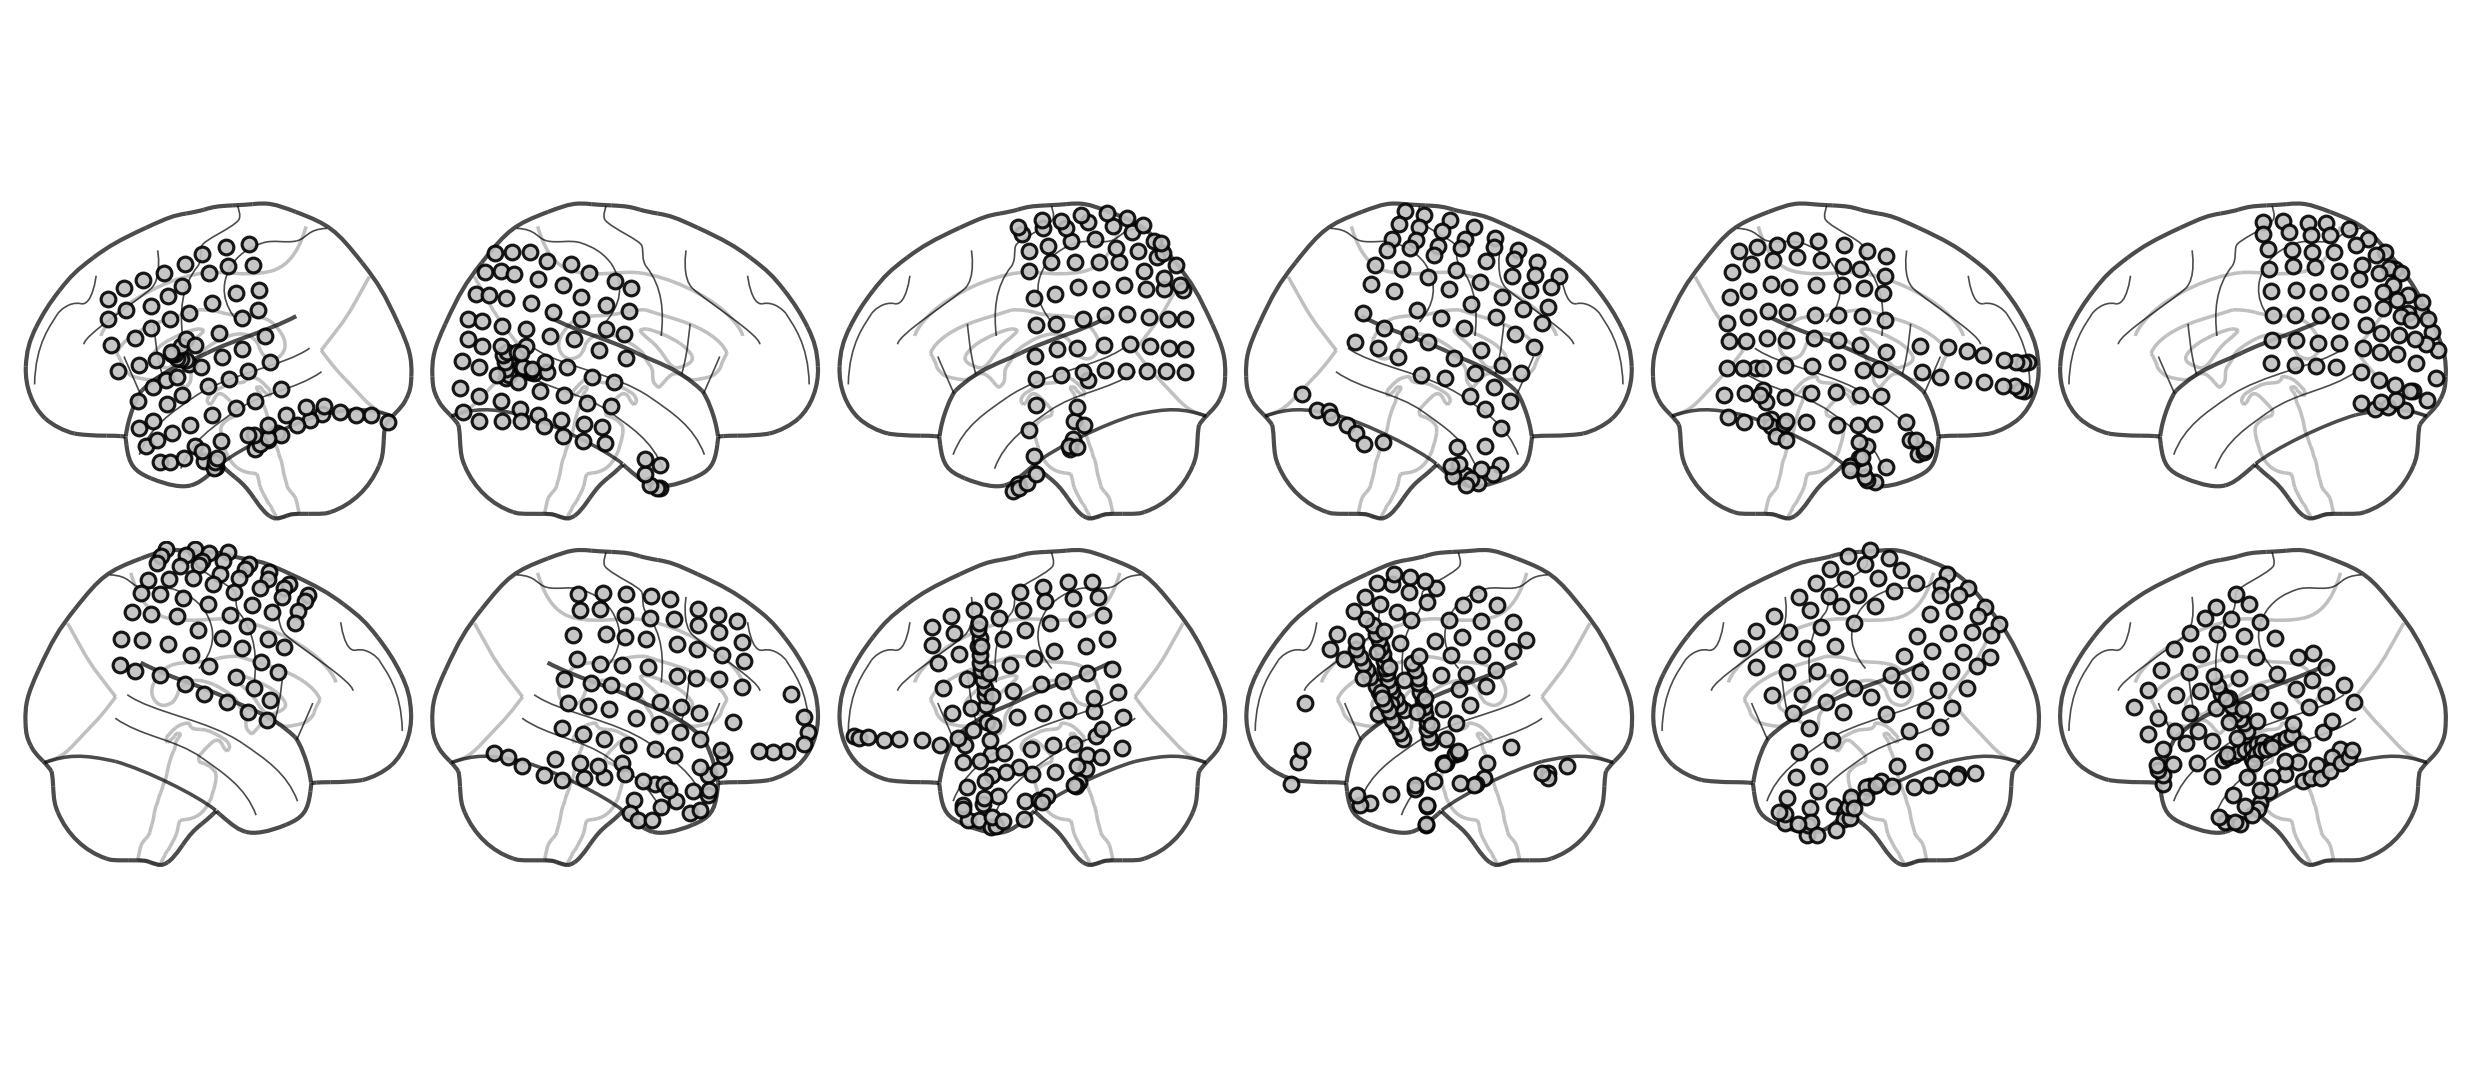

In [ ]:
# Load data characteristics including the number of good and total ECoG electrodes,
# # hemisphere implanted, and number of recording days for each participant.
from plot_utils import (
    load_data_characteristics,
    plot_ecog_descript,
)

dat_chact = load_data_characteristics(fs=fs) # call argument to "fs" is specific to fsspec. "fs" was created as a cache earlier in the notebook.
n_elecs_good, n_elecs_tot = dat_chact[-2], dat_chact[-1]
part_ids = dat_chact[-3]

fig = plot_ecog_descript(n_elecs_tot, n_elecs_good, part_ids, nrows=2,fs=fs)

### Project power analyses on different ECOG grids

/Neuromatch-AJILE12/plot_utils/pow.py:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:94: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:167: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:167: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/Neuromatch-AJILE12/plot_utils/pow.py:167: FutureWarning: 

The `ci` parameter is deprecated

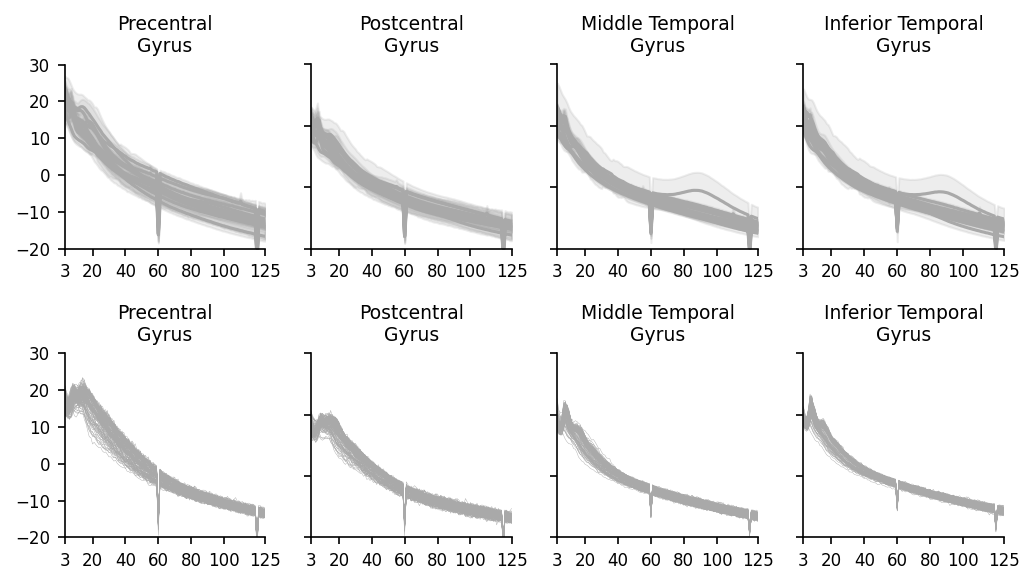

In [ ]:
# Import modules
from plot_utils import plot_ecog_pow

# Define variables
rois_plt = [
    'Precentral',
    'Postcentral',
    'Temporal_Mid',
    'Temporal_Inf'
]
sbplt_titles = [
    'Precentral\nGyrus',
    'Postcentral\nGyrus',
    'Middle Temporal\nGyrus',
    'Inferior Temporal\nGyrus'
]
freq_range = [3, 125]
lp = 'data/'

# Plot power spectra
plot_ecog_pow(
    lp,
    rois_plt,
    freq_range,
    sbplt_titles,
    part_id='P01',
)

## Neural activity and movement behavior relationship

Identify the start and stop times when the behavioral label of interest occurs.

In [ ]:
# get coarse labels from NWB file
min_len = 100  # (sec) only keep times when the given label appears for longer than this amount of time at once

coarse_labels = nwbfile.intervals['epochs'].to_dataframe()
coarse_labels = coarse_labels[coarse_labels['labels'].str.contains(behavior_type)]
coarse_labels['diff'] = coarse_labels['stop_time'] - coarse_labels['start_time']
coarse_labels = coarse_labels[coarse_labels['diff'] > min_len]
coarse_labels.reset_index(inplace=True, drop=True)

# Print the coarse labels as a table
coarse_labels

start_time     stop_time     labels        diff
0   34176.400000  34297.766667  Eat, Talk  121.366667
1   44378.266667  44497.500000  Eat, Talk  119.233333
2   44497.533333  44615.700000  Eat, Talk  118.166667
3   44615.933333  44736.066667  Eat, Talk  120.133333
4   44736.200000  44976.433333  Eat, Talk  240.233333
5   44976.500000  45095.933333  Eat, Talk  119.433333
6   45096.066667  45216.766667  Eat, Talk  120.700000
7   45216.800000  45336.100000  Eat, Talk  119.300000
8   64655.533333  64776.133333  Eat, Talk  120.600000
9   64776.166667  64895.733333  Eat, Talk  119.566667
10  64895.833333  65023.033333  Eat, Talk  127.200000
11  65375.533333  65501.966667    Eat, TV  126.433333
12  70177.000000  70297.566667    Eat, TV  120.566667
13  70297.633333  70418.000000    Eat, TV  120.366667
14  70418.033333  70537.633333    Eat, TV  119.600000
15  70537.700000  70655.333333    Eat, TV  117.633333
16  70655.466667  70774.933333    Eat, TV  119.466667
17  70775.033333  70897.666667    Eat, TV  122.633333
18  70897.766667  71015.100000    Eat, TV  117.333333
19  71015.133333  71136.366667    Eat, TV  121.233333
20  71377.233333  71495.700000    Eat, TV  118.466667
21  71495.800000  71615.500000    Eat, TV  119.700000
22  71615.566667  71735.033333    Eat, TV  119.466667

Load the corresponding ECoG data for each behavioral label chunk and convert to spectral power via the Hilbert transform.

In [ ]:
filter_order = 4  # order of butterworth filter used to bandpass filter the ECoG data

neural_data = nwbfile.acquisition['ElectricalSeries'].data
sampling_rate = nwbfile.acquisition['ElectricalSeries'].rate  # (Hz) ECoG sampling rate
neural_power = []
for i in range(coarse_labels.shape[0]):
    # Identify the start/end indices for each continuous chunk of the given behavioral label
    start_t = int(coarse_labels.loc[i, 'start_time']*sampling_rate)
    end_t = int(coarse_labels.loc[i, 'stop_time']*sampling_rate)

    # Load data snippet
    neur_data_curr = neural_data[start_t:end_t, ecog_ch_num]

    # Bandpass filter
    sos = butter(filter_order, neural_freq_range, btype='bandpass', output='sos', fs=sampling_rate)
    neur_data_filtered = sosfiltfilt(sos, neur_data_curr)

    # Apply Hilbert transform and convert to decibels
    neur_pow = np.abs(hilbert(neur_data_filtered))
    neur_pow = 10*np.log(neur_pow)

    # Take the difference between neighboring timepoints
    neural_power.append(np.diff(neur_pow))

Load the corresponding pose data for each behavioral label chunk and convert to vertical velocity.

In [ ]:
keypoints = list(nwbfile.processing['behavior'].data_interfaces['Position'].spatial_series.keys())
assert keypoint_of_interest in keypoints
assert pose_direction in ['vertical', 'horizontal']
keypoint_series = nwbfile.processing['behavior'].data_interfaces['Position'].spatial_series[keypoint_of_interest]
sampling_rate_keypoint = keypoint_series.rate  # Hz
keypoint_velocity = []
for i in range(coarse_labels.shape[0]):
    start_t = int(coarse_labels.loc[i, 'start_time']*sampling_rate_keypoint)
    end_t = int(coarse_labels.loc[i, 'stop_time']*sampling_rate_keypoint)

    # Load pose data snippet
    pose_data_curr = keypoint_series.data[start_t:end_t, :]
    pose_mag_curr = pose_data_curr[:, 1 if pose_direction == 'vertical' else 0]

    # Convert to velocity (delta X / delta t)
    velocity_curr = np.diff(pose_mag_curr)/(1/sampling_rate_keypoint)
    keypoint_velocity.append(velocity_curr)

### Align and combine neural and pose data

In [ ]:
assert len(neural_power) == len(keypoint_velocity)
measures_all = []
for i in range(len(neural_power)):
    # Neural power for the given chunk
    neur_curr = neural_power[i]
    l_neur = len(neur_curr)

    # Pose velocity for the given chunk
    accel_curr = keypoint_velocity[i]
    l_accel = len(accel_curr)

    # Downsample neural data to match pose data
    inds_split = np.array_split(np.arange(l_neur), l_accel)
    for j, inds in enumerate(inds_split):
        measures_all.append([neur_curr[inds].mean(), accel_curr[j]])

# Combine neural/pose data into a dataframe
df_measures_all = pd.DataFrame(np.asarray(measures_all), columns=['Neural power (dB)', 'Keypoint velocity (pixels/sec)'])

# Remove any NaN's
df_measures_all.dropna(inplace=True)

# Remove instances with velocity close to 0
df_measures_all = df_measures_all[(df_measures_all['Keypoint velocity (pixels/sec)'] > 100) |\
                                  (df_measures_all['Keypoint velocity (pixels/sec)'] < -100)]

### Print correlation between neural power and keypoint velocity
We find a small, positive correlation between neural power in the gamma band and right wrist vertical velocity.

In [ ]:
df_measures_all.corr(method='pearson')

Neural power (dB)  \
Neural power (dB)                        1.000000   
Keypoint velocity (pixels/sec)           0.025379   

                                Keypoint velocity (pixels/sec)  
Neural power (dB)                                     0.025379  
Keypoint velocity (pixels/sec)                        1.000000

### Perform robust linear regression to quantify any linear relationships
Regression identifies a small, but significant (p<0.05) positive relationship between neural power in the gamma band and right wrist vertical velocity. This result makes sense because moving one's wrist upward takes more effort (fighting against gravity) than moving one's arm downward and thus may require slightly more cortical control.

In [ ]:
X = df_measures_all['Keypoint velocity (pixels/sec)']
Y = df_measures_all['Neural power (dB)']

X = sm.add_constant(X)
rlm_model = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:      Neural power (dB)   No. Observations:                 6447
Model:                            RLM   Df Residuals:                     6445
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        08:21:31                                         
No. Iterations:                    16                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0075      0.006     -1.251      0.211      -0.019       0.004
Keypoint velocity (pixels/sec)  1.635e-05   6.62e-06      2.470      0.014    3.37e-06    2.93e-05
==================================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### Plot data with linear fit
Most of the data appears clustered near 0 velocity. The positive relationship between neural power and right wrist vertical velocity is only barely visible. Additional steps that may help better understand the relationship between neural spectral power and wrist velocity include: removing pose data with abnormally high standard deviation due to noisy tracking, subtracting spectral power in nearby periods with minimal movement from ECoG spectral power, and manually reviewing pose trajectories to remove noisy tracking periods.

<Axes: xlabel='Keypoint velocity (pixels/sec)', ylabel='Neural power (dB)'>

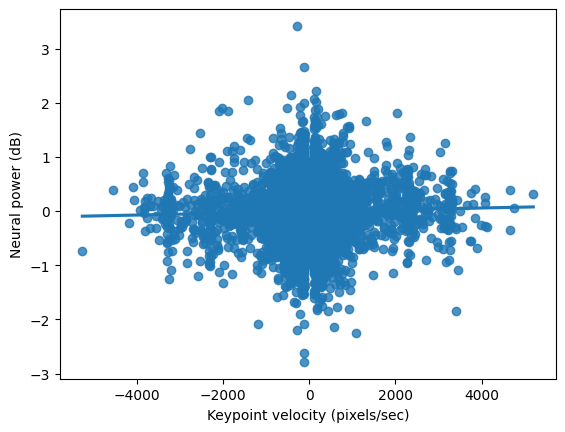

In [ ]:
sns.regplot(data=df_measures_all, x='Keypoint velocity (pixels/sec)', y='Neural power (dB)', robust=True, ci=None)